#Introducción

El presente archivo .ipynb contiene mayormente el código utilizado para la resolución del Trabajo Práctico N°1 de la materia. Toda la explicación detallada respecto a las decisiones que tomamos y justificaciones se encuentran en informe en formato pdf.

## Integrantes
- Enzo Ferrari
- Micaela Mailen Pozzo
- Abril Nazarena Rodriguez

# Ejercicio 1 - Recolección de datos - Web scraping

El objetivo de este ejercicio es realizar web scraping para obtener información de noticias de cuatro categorías diferentes y almacenar los datos en un DataFrame. Para cada categoría, se recopilarán los siguientes detalles de las noticias: categoría, título, texto y URL.

Se realizará un total de 10 web scraping por categoría, lo que resultará en un DataFrame llamado 'df' que contendrá un total de 40 noticias con la información requerida.

In [ ]:
# Librerías utilizadas para este ejercicio

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Creamos el dataframe donde se almacenará el resultado final.

df = pd.DataFrame(columns=["Categoria", "Titulo", "Texto", "URL"])


## Categoría: Economía
Para esto, recolectamos las noticias de Ámbito Financiero. Desde la sección contenidos, recolectamos todos los links de los artículos y luego recolectamos el texto de cada noticia.

Dentro de cada noticia, se tendrán que utilizar métodos necesarios para manejar la generación dinámica de archivos HTML.

In [ ]:
# Recolectar link de cada noticia
url = 'https://www.ambito.com/contenidos/economia.html'

# Leer página
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Inspeccionando elemento sobre la página, observamos que todas las noticias
# tienen una clase de 'news-article__info-wrapper' bajo el tag div

article_tag = soup.find_all('div', class_ = 'news-article__info-wrapper')

len(article_tag)

11

In [ ]:
# Ahora, iteramos sobre cada uno de estos tags, observando que los links
# se encuentran bajo el href de un tag a con la clase news-article__title

links = []
for tag in article_tag:
  link = tag.select_one('.news-article__title a').get('href')
  title = tag.select_one('.news-article__title a').get_text().strip()
  links.append((title,link))
links
#tag

[('CyberMonday: bancos y billeteras virtuales ofrecen descuentos de hasta 50%',
  'https://www.ambito.com/economia/cybermonday-bancos-y-billeteras-virtuales-ofrecen-descuentos-50-n5862988'),
 ('Vacaciones 2024: cuánto sale alquilar una carpa en la costa argentina',
  'https://www.ambito.com/economia/vacaciones-2024-cuanto-sale-alquilar-una-carpa-la-costa-argentina-n5861911'),
 ('Clave para el precio del aceite: el Gobierno extendió el fideicomiso hasta diciembre',
  'https://www.ambito.com/economia/clave-el-precio-del-aceite-el-gobierno-extendio-el-fideicomiso-diciembre-n5862752'),
 ('Quién es Luiz Barsi, el "Warren Buffett" brasileño que salió de la pobreza',
  'https://www.ambito.com/economia/quien-es-luiz-barsi-el-warren-buffett-brasileno-que-salio-la-pobreza-n5862661'),
 ('Para contribuyentes: AFIP sumó a Cuenta DNI como medio de pago',
  'https://www.ambito.com/economia/para-contribuyentes-afip-sumo-cuenta-dni-como-medio-pago-n5862636'),
 ('Youtube Premium aumentó 124% los precios

### Problemas con selenium
Si bien en la página en donde recolectamos los links no hubieron scripts de JavaScripts generando una vista dinámica, dentro de cada artículo sí. Por lo que tenemos que optar por crear una vista dinámica antes de parsear la página.

Al parecer, colab tiene problemas para crear la vista dinámica con selenium. Decidimos hacer esta parte en un entorno local, se compartirá en la entrega el proceso mediante el cual se extrajo el texto mediante un archivo .py.

Importamos el csv que creamos en nuestro entorno

In [ ]:
# Hago esto porque no quiere desaparecer Unnamed: 0
df_economia = pd.read_csv('economia.csv')[['title','category','text','url']]
df_economia.columns

# Renombramos las columnas así usamos todos los mismos nombres
df_economia.columns = ['Titulo','Categoria','Texto', 'URL']
df_economia

,Titulo,Categoria,Texto,URL
0,Economía sale a buscar al menos $505.000 millo...,Economía,Aunque todavía queden por delante las dos lic...,https://www.ambito.com/economia/sale-buscar-al...
1,Petróleo: cae el precio ante esfuerzos diplomá...,Economía,El precio del barril de petróleo bajó hoy en ...,https://www.ambito.com/economia/petroleo-cae-e...
2,"Los salarios subieron en agosto 7,6% y quedaro...",Economía,"En agosto, el Índice de salarios se increment...",https://www.ambito.com/economia/los-salarios-s...
3,Precios de la carne al alza: cortes caros vs. ...,Economía,Después del reciente aumento en el valor del ...,https://www.ambito.com/economia/precios-la-car...
4,Desde noviembre aumentan un 50% los peajes: có...,Economía,Las tarifas de los peajes en rutas nacionales...,https://www.ambito.com/economia/desde-noviembr...
5,Amplían la bonificación de tasa en créditos pa...,Economía,La Subsecretaría de Financiamiento y Regulaci...,https://www.ambito.com/economia/amplian-la-bon...
6,Créditos con tasa del 50% para MiPyMEs: qué se...,Economía,A través de la Disposición 97/2023 - publicad...,https://www.ambito.com/economia/creditos-tasa-...
7,"La economía de EEUU se aceleró al 4,9% en el t...",Economía,El producto interno bruto (PIB) de Estados Un...,https://www.ambito.com/economia/la-eeuu-crecio...
8,Mercado Pago ahora paga más por dejar la plata...,Economía,La suba de tasas que impulsó el Banco Centra...,https://www.ambito.com/economia/mercado-pago-a...
9,¿Sube el precio del pan?: actualizan valor de ...,Economía,A través de la Resolución 1860/2023 de la Sec...,https://www.ambito.com/economia/sube-el-precio...


In [ ]:
# Concatenar al dataframe final
df = pd.concat([df, df_economia], ignore_index=True)
df

,Categoria,Titulo,Texto,URL
0,Economía,Economía sale a buscar al menos $505.000 millo...,Aunque todavía queden por delante las dos lic...,https://www.ambito.com/economia/sale-buscar-al...
1,Economía,Petróleo: cae el precio ante esfuerzos diplomá...,El precio del barril de petróleo bajó hoy en ...,https://www.ambito.com/economia/petroleo-cae-e...
2,Economía,"Los salarios subieron en agosto 7,6% y quedaro...","En agosto, el Índice de salarios se increment...",https://www.ambito.com/economia/los-salarios-s...
3,Economía,Precios de la carne al alza: cortes caros vs. ...,Después del reciente aumento en el valor del ...,https://www.ambito.com/economia/precios-la-car...
4,Economía,Desde noviembre aumentan un 50% los peajes: có...,Las tarifas de los peajes en rutas nacionales...,https://www.ambito.com/economia/desde-noviembr...
5,Economía,Amplían la bonificación de tasa en créditos pa...,La Subsecretaría de Financiamiento y Regulaci...,https://www.ambito.com/economia/amplian-la-bon...
6,Economía,Créditos con tasa del 50% para MiPyMEs: qué se...,A través de la Disposición 97/2023 - publicad...,https://www.ambito.com/economia/creditos-tasa-...
7,Economía,"La economía de EEUU se aceleró al 4,9% en el t...",El producto interno bruto (PIB) de Estados Un...,https://www.ambito.com/economia/la-eeuu-crecio...
8,Economía,Mercado Pago ahora paga más por dejar la plata...,La suba de tasas que impulsó el Banco Centra...,https://www.ambito.com/economia/mercado-pago-a...
9,Economía,¿Sube el precio del pan?: actualizan valor de ...,A través de la Resolución 1860/2023 de la Sec...,https://www.ambito.com/economia/sube-el-precio...


## Categoría: Deportes

Comenzamos creando un DataFrame vacío 'df_deportes' donde se almacenará toda la información referida a esta categoría: categoría, título, texto y URL.

In [ ]:
df_deportes = pd.DataFrame(columns=["Categoria", "Titulo", "Texto", "URL"])

Definimos una función 'webscraping_dep' que recibirá una url correspondiente a cada una de las 10 noticias encontradas y el dataframe de deportes, que luego agregará un registro (noticia) por cada iteración. Esta función realiza webscraping de cada url recibida por parámetro y devuelve el dataframe con la nueva información que respecta a dicha url.

In [ ]:
def webscraping_dep(url, df):
    '''Recibe una url y un dataframe y realiza un webscraping
      de la página. Luego, almacena los datos en el df'''

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraemos el título
    title = soup.find('div', {'class': 'capa_cab_post'}).find('h1').text

    # Extraemos el texto
    texto_div = soup.find('div', {'class': 'entry-content'})
    paragraphs = texto_div.find_all('p')
    texto = '\n'.join(par.text for par in paragraphs)

    # Nombre de la categoría
    categoria = "Deportes"

    # Creamos un diccionario con la info, lo convertimos en un DataFrame y lo concatenamos con el de deportes
    data = {"Categoria": [categoria],
        "Titulo": [title],
        "Texto": [texto],
        "URL": [url]}

    temp_df = pd.DataFrame(data)

    df = pd.concat([df, temp_df], ignore_index=True)

    return df

Luego, dentro de la variable 'url' guardamos la página de donde se extraerán los 10 blogs de la categoría Deportes.

Cada blog está identificado con un id dentro de la página principal de 'cosasdedeportes.es'. A continuación, identificamos los 10 primeros id's.

In [ ]:
# Obtenemos los primeros 10 ids que corresponden a cada noticia de la página de deportes
url = "https://www.cosasdedeportes.es/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentramos la sección <div> con id="loop"
loop_div = soup.find('div', id='loop')

# Primeros 10 elementos <article> con atributo id
articles_with_id = loop_div.find_all('article', id=True)[:10]


Iteramos con un 'for' por cada artículo identificado con su id, y realizamos webscraping llamando a la función definida anteriormente.

In [ ]:
# En un for, hacemos webscraping de cada noticia

for article in articles_with_id:
    link = article.find('a', class_='entry-thumbnail')
    if link:
        url = link.get('href')  # Extraigo la url de cada blog
        df_deportes = webscraping_dep(url, df_deportes)

In [ ]:
df_deportes

,Categoria,Titulo,Texto,URL
0,Deportes,9 destinos de Golf imprescindibles para tus vi...,Si eres un apasionado del golf y estás buscand...,https://www.cosasdedeportes.es/9-destinos-de-g...
1,Deportes,¿En qué consiste Triatlón?,El orden de los tres segmentos debe de ser ést...,https://www.cosasdedeportes.es/en-que-consiste...
2,Deportes,"Bicicletas eléctricas, una opción sostenible y...","Sin embargo, no todos los usuarios disponen de...",https://www.cosasdedeportes.es/bicicletas-elec...
3,Deportes,¿Cuál es la diferencia entre el tenis y el pádel?,Si nunca has practicado ninguno de los dos dep...,https://www.cosasdedeportes.es/cual-es-la-dife...
4,Deportes,Cómo es el museo del F.C. Barcelona,"Por suerte, es posible verlo de cerca y desde ...",https://www.cosasdedeportes.es/como-es-el-muse...
5,Deportes,Las mejores botas de fútbol del 2022,Una vez valoradas las necesidades y encontrada...,https://www.cosasdedeportes.es/las-mejores-bot...
6,Deportes,3 claves que debes saber antes de hacer sender...,"Así pues, en los siguientes apartados proceder...",https://www.cosasdedeportes.es/3-claves-que-de...
7,Deportes,Shokz ha revolucionado la forma de escuchar mú...,Practicar deporte sin renunciar al sonido amb...,https://www.cosasdedeportes.es/shokz-ha-revolu...
8,Deportes,Ideas de negocios rentables para el Mundial de...,"Marcas globales como Toyota, Coca-Cola, Nike,...",https://www.cosasdedeportes.es/ideas-de-negoci...
9,Deportes,Hidratos de carbono y proteínas en la alimenta...,Recurrir a suplementos dietéticos es la mejor...,https://www.cosasdedeportes.es/hidratos-de-car...


Finalmente, concatenamos el dataframe con las noticias de deporte y el dataframe original.

In [ ]:
df = pd.concat([df, df_deportes], ignore_index=True)
df

,Categoria,Titulo,Texto,URL
0,Economía,Economía sale a buscar al menos $505.000 millo...,Aunque todavía queden por delante las dos lic...,https://www.ambito.com/economia/sale-buscar-al...
1,Economía,Petróleo: cae el precio ante esfuerzos diplomá...,El precio del barril de petróleo bajó hoy en ...,https://www.ambito.com/economia/petroleo-cae-e...
2,Economía,"Los salarios subieron en agosto 7,6% y quedaro...","En agosto, el Índice de salarios se increment...",https://www.ambito.com/economia/los-salarios-s...
3,Economía,Precios de la carne al alza: cortes caros vs. ...,Después del reciente aumento en el valor del ...,https://www.ambito.com/economia/precios-la-car...
4,Economía,Desde noviembre aumentan un 50% los peajes: có...,Las tarifas de los peajes en rutas nacionales...,https://www.ambito.com/economia/desde-noviembr...
5,Economía,Amplían la bonificación de tasa en créditos pa...,La Subsecretaría de Financiamiento y Regulaci...,https://www.ambito.com/economia/amplian-la-bon...
6,Economía,Créditos con tasa del 50% para MiPyMEs: qué se...,A través de la Disposición 97/2023 - publicad...,https://www.ambito.com/economia/creditos-tasa-...
7,Economía,"La economía de EEUU se aceleró al 4,9% en el t...",El producto interno bruto (PIB) de Estados Un...,https://www.ambito.com/economia/la-eeuu-crecio...
8,Economía,Mercado Pago ahora paga más por dejar la plata...,La suba de tasas que impulsó el Banco Centra...,https://www.ambito.com/economia/mercado-pago-a...
9,Economía,¿Sube el precio del pan?: actualizan valor de ...,A través de la Resolución 1860/2023 de la Sec...,https://www.ambito.com/economia/sube-el-precio...


## Categoría: IA

Esta función toma una URL, extrae información específica de la página web,realizando webscraping y la almacena en un Dataframe 'df' y luego devuelve ese DataFrame.

In [ ]:
def webscraping_ia(url, df):
    '''Recibe una url y el dataframe y realiza un webscraping
      de la página. Luego, almacena los datos en un df'''

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraigo el título
    title = soup.find('div', {'class': 'fullpost__encabezado'}).find('h1').text

    # Extraigo el texto
    texto_div = soup.find('div', {'class': 'fullpost__cuerpo'})
    paragraphs = texto_div.find_all('p')
    texto = '\n'.join(par.text for par in paragraphs)

    # Nombre de la categoría
    categoria = "Inteligencia Artificial"

    # Creo un diccionario con la info, lo convierto en un DataFrame y lo concateno con el principal
    data = {"Categoria": [categoria],
        "Titulo": [title],
        "Texto": [texto],
        "URL": [url]}

    temp_df = pd.DataFrame(data)

    df = pd.concat([df, temp_df], ignore_index=True)

    return df

Busca y recopila las URLs de las primeras 10 noticias relacionadas con inteligencia artificial en la página "https://marketba.tech/categoria/6/inteligencia-artificial". Las URLs se almacenan en la lista urls, lo que  permite acceder a las páginas de estas noticias para realizar acciones adicionales, como el web scraping de los contenidos.

In [ ]:
# Obtengo los primeros 10 ids que corresponden a cada noticia de la página de inteligencia artificial
url = "https://marketba.tech/categoria/6/inteligencia-artificial"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentro la sección <div> con id="loop"
loop_div = soup.find('div', class_='lista-contenido')

# Encontrar las 10 primeras noticias
noticias = soup.find_all('article', class_='post post__noticia')[:10]

urls = [noticia.find('a')['href'] for noticia in noticias]

El DataFrame 'df_ia' contiene los datos extraídos de las noticias relacionadas con inteligencia artificial en las primeras 10 URLs de la página "https://marketba.tech/categoria/6/inteligencia-artificial". Cada fila del DataFrame representa una noticia con su categoría, título, texto y URL.

In [ ]:
# Creo dataframe donde se almacenarán las noticias
df_ia = pd.DataFrame(columns=["Categoria", "Titulo", "Texto", "URL"])


# Iterar a través de las URLs y realizar el scraping
for article in urls:
    df_ia = webscraping_ia("https://marketba.tech/" + article, df_ia)

In [ ]:
df_ia

,Categoria,Titulo,Texto,URL
0,Inteligencia Artificial,"Optimus, el robot humanoide de Tesla.",Presentado por primera vez en el evento de Int...,https://marketba.tech//contenido/419/optimus-e...
1,Inteligencia Artificial,"OpenAI aborda ""alucinaciones"" en ChatGPT para ...",OpenAI trabaja para mejorar la confiabilidad d...,https://marketba.tech//contenido/350/openai-ab...
2,Inteligencia Artificial,Google Cloud: Cursos gratuitos para construir ...,Google Cloud ha lanzado una serie de cursos gr...,https://marketba.tech//contenido/348/google-cl...
3,Inteligencia Artificial,Brad Smith de Microsoft y los cinco puntos par...,"El presidente de Microsoft, Brad Smith publicó...",https://marketba.tech//contenido/330/brad-smit...
4,Inteligencia Artificial,"Sam Altman, creador de Open IA lanza advertencia.",El fundador del revolucionario Chatgpt de OPEN...,https://marketba.tech//contenido/296/sam-altma...
5,Inteligencia Artificial,Como iniciar en Chatgpt paso a paso.,"ChatGPT, es la herramienta de generación de le...",https://marketba.tech//contenido/222/como-inic...
6,Inteligencia Artificial,SAM: un nuevo modelo de IA de Meta que segment...,Segment Anything Model (SAM) utiliza una técni...,https://marketba.tech//contenido/202/sam-un-nu...
7,Inteligencia Artificial,¿Que es un Prompt? y como mejorar tu uso de la...,¿Que es un Prompt en inteligencia artificial?\...,https://marketba.tech//contenido/187/que-es-un...
8,Inteligencia Artificial,"Sam Altman, CEO de OpenAI y su contestación cu...",Sam Altman se encuentra hoy entre las personal...,https://marketba.tech//contenido/138/sam-altma...
9,Inteligencia Artificial,Un Papa Francisco al tope de la moda con intel...,Hace unos días empezó a circular una imagen de...,https://marketba.tech//contenido/134/un-papa-f...


Concatenamos con el dataframe final'df'

In [ ]:
df = pd.concat([df, df_ia], ignore_index=True)

## Categoría: Salud

Comenzamos creando un dataframe 'df_salud' donde se almacenará la información referida a las 10 noticias de esta categoría.

In [ ]:
df_salud = pd.DataFrame(columns=["Categoria", "Titulo", "Texto", "URL"])

Luego, definimos una funcion 'webscraping_salud' que hará webscraping sobre las 10 noticias contenidas en la página web "https://riberasalud.com/blog-de-salud/entradas/".

In [ ]:
def webscraping_salud(url, df):
    '''Recibe una url y un dataframe y realiza un webscraping
      de la página. Luego, almacena los datos en el df'''

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extracción del título
    title = soup.find('h1', itemprop='headline').text

    # Extracción del texto
    texto_div = soup.find('div', {'class': 'entry-content'})
    paragraphs = texto_div.find_all('p')
    texto = '\n'.join(par.text for par in paragraphs)

    # Nombre de la categoría
    categoria = "Salud"

    # Diccionario con la info, lo convierto en un DataFrame y lo concateno con el principal
    data = {"Categoria": [categoria],
        "Titulo": [title],
        "Texto": [texto],
        "URL": [url]}

    temp_df = pd.DataFrame(data)

    df = pd.concat([df, temp_df], ignore_index=True)

    return df

De la misma manera que en las categorías anteriores, hacemos una solitud HTTP a la url y obtenemos las 10 primeras noticias.

Luego, llamamos iterativamente a la función definida anteriormente, para hacer webscrapping en cada noticia y almacenar la información en el dataframe referido a la salud.

In [ ]:
url = "https://riberasalud.com/blog-de-salud/entradas/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra la sección <ul> donde se encuentran las noticias
article_list = soup.find('ul', class_='is-flex-container')

articles = article_list.find_all('li')[:10]

for article in articles:
    link = article.find('a', href=True)  # Encuentra el enlace <a> con el atributo href
    if link:
        url = link.get('href')  # Extraemos la url de cada blog
        df_salud = webscraping_salud(url, df_salud)

In [ ]:
df_salud

,Categoria,Titulo,Texto,URL
0,Salud,Beneficios de una siesta corta,La siesta es “un sueño corto que tiene como ob...,https://riberasalud.com/blog-de-salud/benefici...
1,Salud,Autocuidado: cómo mejorar el propio bienestar ...,“El autocuidado no es un lujo. Es salud”. Así ...,https://riberasalud.com/blog-de-salud/autocuid...
2,Salud,Cáncer de mama en mujeres con la menopausia,Hoy es el Día Mundial de la Menopausia y mañan...,https://riberasalud.com/blog-de-salud/cancer-d...
3,Salud,Consejos para cuidar los pies en excursiones y...,Las vacaciones de verano quedan ya en el recue...,https://riberasalud.com/blog-de-salud/consejos...
4,Salud,Cómo ayuda la vitamina D a nuestro sistema inm...,"Cuidado. Se acerca el otoño, los cambios brusc...",https://riberasalud.com/blog-de-salud/como-ayu...
5,Salud,"Halitosis, el problema del mal aliento: causas...",La halitosis es un problema con el mal aliento...,https://riberasalud.com/blog-de-salud/halitosi...
6,Salud,Alzheimer y logopedia: cómo ayudar a los mayor...,El Alzheimer es una enfermedad degenerativa qu...,https://riberasalud.com/blog-de-salud/alzheime...
7,Salud,Volvemos a la rutina con la dieta: planifica c...,Esta semana comienzan las clases en colegios y...,https://riberasalud.com/blog-de-salud/volvemos...
8,Salud,Mi bebé gira la cabeza solo hacia un lado: tor...,Casi todos nos hemos levantado alguna mañana c...,https://riberasalud.com/blog-de-salud/mi-bebe-...
9,Salud,Problemas en los pies por elegir un mal calzado,"Esta semana o, a más tardar, en unos días más ...",https://riberasalud.com/blog-de-salud/problema...


Finalmente, concatenamos el nuevo dataframe con el global 'df', donde están contenidas el resto de las noticias de las demás categorías.

In [ ]:
df = pd.concat([df, df_salud], ignore_index=True)

## Dataframe final

Luego de concatenar los dataframes con la información de cada categoría, el siguiente dataframe 'df' es el resultado final del ejercicio.

In [ ]:
df

,Categoria,Titulo,Texto,URL
0,Economía,Economía sale a buscar al menos $505.000 millo...,Aunque todavía queden por delante las dos lic...,https://www.ambito.com/economia/sale-buscar-al...
1,Economía,Petróleo: cae el precio ante esfuerzos diplomá...,El precio del barril de petróleo bajó hoy en ...,https://www.ambito.com/economia/petroleo-cae-e...
2,Economía,"Los salarios subieron en agosto 7,6% y quedaro...","En agosto, el Índice de salarios se increment...",https://www.ambito.com/economia/los-salarios-s...
3,Economía,Precios de la carne al alza: cortes caros vs. ...,Después del reciente aumento en el valor del ...,https://www.ambito.com/economia/precios-la-car...
4,Economía,Desde noviembre aumentan un 50% los peajes: có...,Las tarifas de los peajes en rutas nacionales...,https://www.ambito.com/economia/desde-noviembr...
5,Economía,Amplían la bonificación de tasa en créditos pa...,La Subsecretaría de Financiamiento y Regulaci...,https://www.ambito.com/economia/amplian-la-bon...
6,Economía,Créditos con tasa del 50% para MiPyMEs: qué se...,A través de la Disposición 97/2023 - publicad...,https://www.ambito.com/economia/creditos-tasa-...
7,Economía,"La economía de EEUU se aceleró al 4,9% en el t...",El producto interno bruto (PIB) de Estados Un...,https://www.ambito.com/economia/la-eeuu-crecio...
8,Economía,Mercado Pago ahora paga más por dejar la plata...,La suba de tasas que impulsó el Banco Centra...,https://www.ambito.com/economia/mercado-pago-a...
9,Economía,¿Sube el precio del pan?: actualizan valor de ...,A través de la Resolución 1860/2023 de la Sec...,https://www.ambito.com/economia/sube-el-precio...


In [ ]:
df.to_csv("df.csv")

# Ejercicio 2

En base a los títulos y categorías del dataset resultante en el ejercicio anterior, el propósito es desarrollar y entrenar un modelo de clasificación de noticias.

Este modelo permitirá la asignación automática de noticias a categorías específicas basándose en el título de cada una. El objetivo principal es lograr una clasificación precisa de noticias en sus respectivas categorías, lo que puede ser de utilidad para diversas aplicaciones, como la organización y etiquetado automático de contenido.

**¿Cómo se hace esto?**

Para lograr esto basicamente hay que entrenar un modelo de regresión logística, para poder predecir la clase de cada texto.

Un modelo de regresión logística toma como variable explicativa el texto y como variable de respuesta la categoría.

**Vectorización**

¿Por qué es necesario vectorizar? Es necesario vectorizar por el simple hecho de que los modelos de machine learning necesitan un input numérico, no entienden el texto tal y cual como está.

Como vimos en las primeras unidades, hay múltiples maneras de vectorizar texto, entre ellas:
- One-hot encoding.
- Count vectorizer.
- TF-IDF.

Estas técnicas pueden ser buenas para algunos propósitos, sin embargo fallan en captar el contexto de una palabra y su sintaxis. Por otro lado, tenemos otros tipos de vectorización que son aquellas que utilizan redes neuronales, en particular, las técnicas de Word Embedding.

**BERT**

Existen modelos pre-entrenados basados en la arquitectura BERT que nos permiten vectorizar nuestro texto. Elegimos esta técnica de vectorización para nuestro modelo.

**¿Tomamos texto y/o título como variable explicativa?**

Debemos decidir esto antes de entrenar el modelo. Una concatenación del título y el texto podría dar buenos resultados, sin embargo el modelo esperaría que se le brinde la información en ese formato, por ahora usemos solo el texto para ver los resultados

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

# Ajustamos nuestros datos a un conjunto de entrenamiento y de prueba
categorias = {'Economía':0,
              'Deportes':1,
              'Salud':2,
              'Inteligencia Artificial':3}

df['Categoria_codificada'] = df['Categoria'].map(categorias)

X = df['Texto']
y = df['Categoria_codificada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Cargar el tokenizador y modelo preentrenado de BERT para español
model_name = 'dccuchile/bert-base-spanish-wwm-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embeddings(texts):
    """Función para obtener los embeddings de BERT para una lista de textos."""
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Usamos el embedding del token [CLS] como la representación del texto
        embeddings.append(outputs.last_hidden_state[0][0].numpy())
    return np.array(embeddings)

# Obtenemos los embeddings de BERT para los conjuntos de entrenamiento y prueba
X_train_vectorized = get_bert_embeddings(X_train)
X_test_vectorized = get_bert_embeddings(X_test)

# Creación y entrenamiento del modelo de Regresión Logística
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precisión Regresión Logística: 1.0
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
# Inferencia con datos propios
categorias = {'Economía':0,
              'Deportes':1,
              'Salud':2,
              'Inteligencia Artificial':3}

texto = ['Los avances recientes en IA pueden ser muy favorables para la medicina moderna',
         'La medicina moderna puede verse favorecida por la inteligencia artificial',
         'El último mes tuvo una inflación del 3%',
         'El proximo partido tendrá estrellas muy prometedoras',
         'Ella no sabía que la jeringa estaba infectada',
         'La medicina no ha traído efectos adversos hasta ahora',
         'La dieta recomendada no ha ayudado al niño, que dicho de paso, esta pasando por la adolescencia',
         'Hay que preguntarse si acaso el cáncer de mama ha podido llegar a afectar al bebe en alguna parte.']

vector = get_bert_embeddings(texto)
modelo_LR.predict(vector)

array([3, 3, 0, 1, 3, 2, 2, 2])

## Analizar resultados
Revisemos las longitudes de los textos para así analizar si los datos están balanceados o no, lo que podría llegar a causar overfitting.

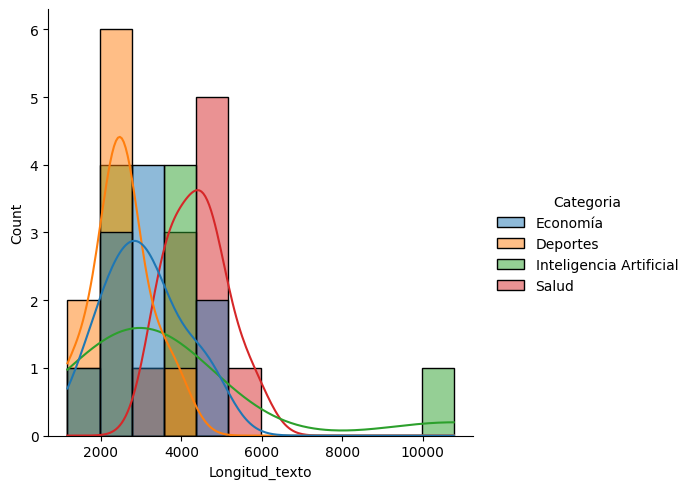

In [ ]:
import seaborn as sns
df['Longitud_texto'] = df['Texto'].apply(lambda x: len(x))
sns.displot(df, x='Longitud_texto', hue='Categoria', kde=True)

In [ ]:
df.groupby('Categoria')['Longitud_texto'].sum()

Categoria
Deportes                   25035
Economía                   30564
Inteligencia Artificial    37413
Salud                      43899
Name: Longitud_texto, dtype: int64

## Conclusiones
Analizando la distribución de cantidad de palabras en las categorías, podemos observar el balanceo de estas mismas. Notamos que no están bien balanceadas, sin embargo, el problema no es este.

Vemos que la clase Salud esta underfitteada, esto quiere decir que a pesar de hacer inferencia con palabras que claramente deberían pertenecer a Salud, nos da otra categoría. Observando las noticias de esta categoría, vemos que muchas de estas no hablan directamente de salud, y es probable que categorías como IA tengan más palabras relacionadas con la salud que la misma categoría Salud.

Esto será analizado más a fondo en el próximo ejercicio, al ver la frecuencia de las palabras.

# Ejercicio 3

El objetivo de este ejercicio es, en el contexto de cada categoría de noticias, llevar a cabo las siguientes acciones:

- Limpieza y procesamiento del texto: Se aplicarán técnicas de normalización y limpieza de texto a las noticias de cada categoría, como por ejemplo eliminar caracteres especiales, detectar y eliminar de stopwords, entre otras técnicas de preprocesamiento que consideremos necesarias.

- Nube de palabras: A partir del texto ya procesado se generará una nube de palabras que visualice de manera gráfica las palabras más relevantes en cada categoría. Esta nube de palabras proporcionará una representación visual de las palabras más importantes o que más se mencionan.

Finalmente, elaboraremos un análisis general que resuma las tendencias y características más destacadas de cada categoría en función de las palabras clave identificadas.

## Categoría: Deportes

### Limpieza y Normalización

Para esta sección, hemos optado por aplicar las siguientes técnicas de preprocesamiento de texto:

- Conversión a minúsculas. Realizamos esto con el propósito de evitar que se consideren como palabras distintas aquellas que solo difieren en mayúsculas y minúsculas, por ejemplo, 'Deporte' y 'deporte'.

- Eliminación de puntuación. La puntuación, en la mayoría de los casos, no aporta información adicional o valor al análisis. Por lo tanto, decidimos eliminarla para reducir el tamaño de los datos y mejorar la eficiencia computacional.

- Eliminación de palabras de parada (stopwords). Dado que nuestro objetivo es crear una nube de palabras, resulta pertinente eliminar aquellas palabras que carecen de significado.

- Lematización. Tenemos en cuenta esta técnica con el fin de reducir las palabras a su forma base.

En cuanto a otras técnicas de preprocesamiento de texto que estudiamos en la materia, hemos decidido no aplicar algunas de ellas. Por ejemplo, dado que los 40 registros consisten en noticias o blogs redactados por profesionales o personas con habilidades de redacción, consideramos que la corrección ortográfica no es necesaria. Además, los emojis no se encuentran en las noticias, por lo que no los eliminamos. La estandarización del texto tampoco la consideramos relevante en este contexto.

In [ ]:
!python -m spacy download es_core_news_sm

2023-11-02 22:52:44.795923: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 22:52:44.795985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 22:52:44.796023: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 22:52:46.093357: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 30.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import es_core_news_sm

# Convertimos a minúsculas
df_deportes['Texto'] = df_deportes['Texto'].apply(lambda x: x.lower())

# Eliminamos puntuación
df_deportes['Texto'] = df_deportes['Texto'].str.replace('[^\w\s]', '')

# Eliminamos stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return " ".join(filtered_text)

df_deportes['Texto'] = df_deportes['Texto'].apply(remove_stopwords)

# Lematización
text_deportes = df_deportes['Texto'].tolist()
text_completo_dep = " ".join(text_deportes)

nlp = es_core_news_sm.load()
doc = nlp(text_completo_dep)
lemmas = [tok.lemma_.lower() for tok in doc]
print(lemmas)

<ipython-input-33-35aa6fa19ab6>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df_deportes['Texto'] = df_deportes['Texto'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['si', 'apasionado', 'golf', 'buscar', 'lugar', 'perfecto', 'practicar', 'deporte', 'favorito', 'selección', 'mejor', 'destino', 'viaje', 'golf', 'amante', 'golf', 'españa', 'destino', 'solicitado', 'gracias', 'clima', 'mediterráneo', 'favorable', 'campo', 'reconocido', 'nivel', 'internacional', 'lugar', 'ideal', 'disfrutar', 'deporte', 'además', 'españa', 'ser', 'sede', 'importante', 'evento', 'golf', 'famoso', 'campeonato', 'ryder', 'cup', '1997', 'primero', 'edición', 'celebrado', 'europa', 'hora', 'evaluar', 'mejor', 'campo', 'golf', 'mundo', 'existir', 'diferente', 'factor', 'golfista', 'considerar', 'según', 'preferencia', 'personal', 'poder', 'buscar', 'entorno', 'montañoso', 'mientras', 'preferir', 'visto', 'mar', 'además', 'diseño', 'campo', 'valorar', 'instalación', 'servicio', 'adicional', 'ofrecer', 'alquiler', 'carrito', 'golf', 'palo', 'guía', 'esencial', 'turismo', 'golf', 'españa', 'extranjero', 'poder', 'planificar', 'viaje', 'golf', 'sinmaletascom', 'evitar', 'cargar'

A continuación, contaremos las palabras que aparecen con más frecuencia en la columna 'Texto' del dataframe.

In [ ]:
nltk.download('punkt')

text_deportes = df_deportes['Texto'].tolist()
text_completo_dep = " ".join(text_deportes)

# Tokenizamos el texto
words = word_tokenize(text_completo_dep)
sentences = sent_tokenize(text_completo_dep)

# Creamos objetos FreqDist
dic_deportes = FreqDist(words)
fdist_sentences = FreqDist(sentences)

# Imprimimos las frecuencias
dict(dic_deportes)
sorted_words = sorted(dic_deportes.items(), key=lambda x: x[1], reverse=True)
for word, frequency in sorted_words:
    print(f'{word}: {frequency}')

si: 21


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


además: 20
puedes: 19
deporte: 14
cada: 14
hacer: 14
pádel: 13
podrás: 12
ser: 11
tiempo: 11
mundial: 11
golf: 9
mejores: 9
tenis: 9
siempre: 9
mientras: 8
tener: 8
zona: 8
forma: 8
juego: 8
visita: 8
botas: 8
auriculares: 8
deportes: 7
tan: 7
bicicleta: 7
bicicletas: 7
así: 7
mejor: 7
museo: 7
cuenta: 7
partidos: 7
nike: 7
sonido: 7
practicar: 6
disfrutar: 6
pueden: 6
posible: 6
día: 6
eléctricas: 6
incluso: 6
modelos: 6
bastante: 6
aunque: 6
equipo: 6
perfecto: 5
gracias: 5
hora: 5
diferentes: 5
menos: 5
entrenamientos: 5
momento: 5
eléctrica: 5
cualquier: 5
gran: 5
suelen: 5
puedan: 5
días: 5
debes: 5
tecnología: 5
través: 5
lugar: 4
existen: 4
entorno: 4
evitar: 4
tres: 4
debe: 4
importante: 4
triatlón: 4
10: 4
práctica: 4
historia: 4
embargo: 4
modelo: 4
ciudad: 4
hace: 4
paseo: 4
necesidades: 4
cuentan: 4
encontrar: 4
batería: 4
ello: 4
bien: 4
muchas: 4
materiales: 4
pelotas: 4
mayor: 4
camp: 4
nou: 4
conocer: 4
club: 4
gente: 4
largo: 4
momentos: 4
realizar: 4
tampoco: 4
encont

Se observa que las palabras 'además' (22 veces), 'si' (22 veces), 'puedes' (19 veces) y 'cada' (14 veces) son las más frecuentes en los textos de las noticias de la categoría Deportes. Sin embargo, dado que 3 de ellas no aportan significado relevante a la nube de palabras relacionada con la categoría Deportes, hemos decidido eliminarlas para evitar que aparezcan de manera prominente en la representación gráfica.

In [ ]:
palabras_a_eliminar = ['además', 'si', 'cada']
palabras = word_tokenize(text_completo_dep)
# Creamos un nuevo texto sin las palabras a eliminar
text_completo_dep = ' '.join([palabra for palabra in palabras if palabra not in palabras_a_eliminar])

### Nube de palabras

Una vez aplicado técnicas de preprocesamiento de texto, dibujamos la nube de palabras.

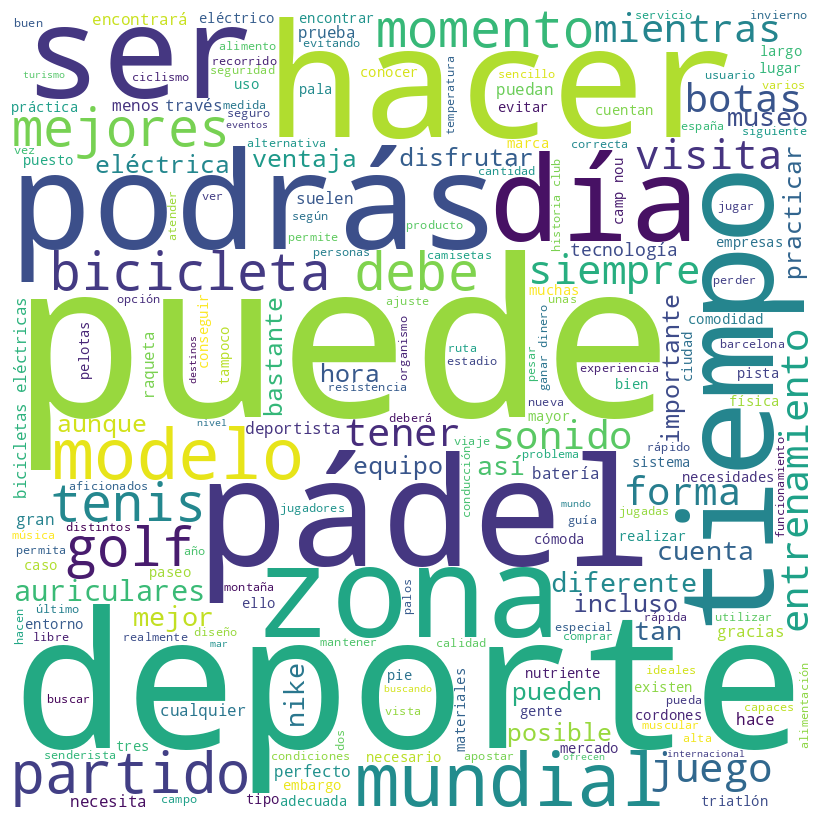

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = None,
min_font_size = 10).generate(text_completo_dep)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


Vemos que, aún habiendo aplicado lematización, una de las primeras palabras que captan la atención al observar el gráfico es 'puede', que comparte el mismo significado que 'podrás' y ambas derivan del verbo 'poder'.

A pesar de esta observación, las palabras más prominentes en el gráfico, como 'deporte', 'pádel', 'mundial', 'juego', 'partido' y 'ventaja', son coherentes con el contexto de la categoría de deportes.

## Categoría: IA

Para esta sección, hemos optado por aplicar las siguientes técnicas de preprocesamiento de texto:\
-Convertimos a minúscula.\
-Eliminación de puntuación.\
-Eliminación  de acentos.\
-Eliminación  de stopwords.\
-Tratamiento de emojis porque observamos que había uno en una de las noticias.\
-Análisis de frecuencia de palabras.\
-Y convertimos todo el texto al español porque encontramos frases en inglés.\
-N-grama.\
-Co-ocurrencia de palabras

### Limpieza de texto

In [ ]:
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emot

# Conversión a minúsculas
df_ia['Texto'] = df_ia['Texto'].str.lower()

# Eliminación de puntuación
df_ia['Texto'] = df_ia['Texto'].str.replace('[^\w\s]', '')

# Eliminación de acentos
def remove_accents(input_str):
  nfkd_form = unicodedata.normalize('NFKD', input_str)
  return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

df_ia['Texto'] = df_ia['Texto'].apply(remove_accents)

# Eliminación de stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
  return " ".join(filtered_text)#

df_ia['Texto'] = df_ia['Texto'].apply(remove_stopwords)

# Tratamiento de Emojis
emot_obj = emot.core.emot() # Crear una instancia de la clase emot

def replace_emoticons_and_emojis(text):
    emoji_dict = emot_obj.emoji(text)
    for emoji in emoji_dict['value']:
        text = text.replace(emoji, '')  # Reemplazar el emoji con una cadena vacía
    return text

df_ia['Texto'] = df_ia['Texto'].apply(replace_emoticons_and_emojis)

<ipython-input-60-68cb21a37b06>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ia['Texto'] = df_ia['Texto'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Luego, como es común encontrar palabras en inglés en los artículos sobre IA, traduciremos estas palabras.

In [ ]:
!pip install deep_tranlator

In [ ]:
from deep_translator import GoogleTranslator

# Función para traducir palabras en inglés a español
def translate_english_to_spanish(text):
    try:
        translated_text = GoogleTranslator(source='en', target='es').translate(text)
        return translated_text
    except Exception as e:
        print(f"Error al traducir: {e}")
        return text

# Aplicar la función de traducción a la columna 'Texto' en el DataFrame
df_ia['Texto'] = df_ia['Texto'].apply(translate_english_to_spanish)

### Análisis del texto

Con el fin de conocer un poco mejor los textos que intervienen en las noticias sobre IA, analizamos los N-gramas y co-ocurrencia de palabras.

Luego, mostramos la frecuencia de palabras.

Comenzamos mostrando los N-Gramas

In [ ]:
import nltk
from nltk.util import ngrams
nltk.download('punkt')

def generate_and_print_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    print(f"{n}-grams para el texto:")
    for gram in n_grams:
        print(gram)

# Valor de n para los n-gramas --> 2 para bigramas
n_value = 2

for index, row in df_ia.iterrows():
    generate_and_print_ngrams(row['Texto'], n_value)
    print()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Se han truncado las últimas 5000 líneas del flujo de salida.
('un', 'profesional')
('profesional', 'en')
('en', 'busca')
('busca', 'de')
('de', 'nuevas')
('nuevas', 'habilidades')
('habilidades', 'o')
('o', 'simplemente')
('simplemente', 'alguien')
('alguien', 'apasionado')
('apasionado', 'por')
('por', 'la')
('la', 'IA')
('IA', ',')
(',', 'estos')
('estos', 'cursos')
('cursos', 'te')
('te', 'brindarán')
('brindarán', 'los')
('los', 'conocimientos')
('conocimientos', 'necesarios')
('necesarios', 'para')
('para', 'explorar')
('explorar', 'todo')
('todo', 'el')
('el', 'potencial')
('potencial', 'de')
('de', 'la')
('la', 'inteligencia')
('inteligencia', 'artificial')
('artificial', '.')
('.', '¿Donde')
('¿Donde', 'encuentro')
('encuentro', 'esto')
('esto', '?')
('?', 'Te')
('Te', 'recomendamos')
('recomendamos', 'buscar')
('buscar', 'la')
('la', 'página')
('página', 'donde')
('donde', 'oficialmente')
('oficialmente', 'Google')
('Google', 'tiene')
('tiene', 'estas')
('estas', 'propuestas')

Luego, la Co-ocurrencia de palabras

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Función para analizar la co-ocurrencia de palabras en un texto y mostrar las oraciones relevantes
def analyze_co_occurrence(text, target_words):
    # Divide el texto en oraciones
    sentences = nltk.sent_tokenize(text)
    # Filtrar las oraciones donde co-ocurren las palabras objetivo
    co_occurrence_sentences = [sentence for sentence in sentences if all(word in sentence for word in target_words)]
    return co_occurrence_sentences

# Palabras objetivo para analizar la co-ocurrencia
target_words = ['inteligencia', 'artificial']

# Aplicar la función para analizar co-ocurrencia a la columna 'Texto' en el DataFrame
for index, row in df_ia.iterrows():
    co_occurrence_sentences = analyze_co_occurrence(row['Texto'], target_words)
    if co_occurrence_sentences:
        print(f"Co-ocurrencias de '{target_words[0]}' y '{target_words[1]}' en el texto {index}:")
        for sentence in co_occurrence_sentences:
            print(sentence)
        print()  # Agrega una línea en blanco para separar los resultados

Co-ocurrencias de 'inteligencia' y 'artificial' en el texto 0:
Cortesía de Tesla, Inc.
Optimus se basa en la sólida tecnología de inteligencia artificial desarrollada por Tesla, como el sistema de asistencia al conductor Autopilot, y utiliza componentes derivados de los productos de energía de la compañía, como la gestión de baterías.
Este interesante y novedoso proyecto en desarrollo de Tesla, Inc. Basado en la tecnología de inteligencia artificial de Tesla y aprovechando los avances en la gestión de baterías y otros componentes de energía, se posiciona como un paso adelante en el campo de la robótica.

Co-ocurrencias de 'inteligencia' y 'artificial' en el texto 1:
OpenAI trabaja para mejorar la confiabilidad de ChatGPT y abordar uno de los mayores problemas de la inteligencia artificial: las "alucinaciones" en los modelos de lenguaje.
Una de las estrategias que se está considerando es entrenar a los modelos de inteligencia artificial para recompensarse a sí mismos cuando generan resp

Finalmente, mostramos la frecuencia de palabras para esta categoría.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Definir una función para tokenizar y contar frecuencias
def tokenize_and_count(text):
    # Tokenizamos el texto en palabras
    words = word_tokenize(text)
    # Creamos un objeto FreqDist para las palabras
    fdist_words = FreqDist(words)
    # Devolvemos un diccionario con las palabras y sus frecuencias
    return dict(fdist_words)

# Aplicar la función a la columna 'Texto' y guardar los resultados en una nueva variable
word_frequencies = df_ia['Texto'].apply(tokenize_and_count)

# Mostrar las palabras y sus frecuencias
for index, frequencies in word_frequencies.iteritems():
    print(f"Frecuencias de palabras en fila {index}:")
    for word, frequency in frequencies.items():
        print(f"{word}: {frequency}")
    print("\n")

Frecuencias de palabras en fila 0:
Presentado: 1
por: 3
primera: 1
vez: 1
en: 17
el: 17
evento: 3
de: 56
Inteligencia: 2
Artificial: 2
la: 14
compañía: 2
19: 1
agosto: 1
2021: 2
,: 32
este: 5
robot: 6
propósito: 1
general: 1
promete: 2
ser: 1
un: 10
avance: 1
significativo: 1
campo: 2
robótica: 3
.: 19
Durante: 1
Elon: 1
Musk: 1
CEO: 1
Tesla: 10
compartió: 1
su: 3
visión: 2
que: 8
Optimus: 8
tiene: 1
potencial: 3
superar: 1
incluso: 1
negocio: 1
los: 7
vehículos: 1
términos: 2
impacto: 1
y: 20
relevancia: 1
demostrando: 2
así: 2
compromiso: 1
con: 11
proyecto: 2
ambicioso: 1
ha: 1
sido: 1
diseñado: 1
para: 7
desempeñar: 1
tareas: 5
repetitivas: 1
aburridas: 1
resultan: 1
agotadoras: 1
o: 3
poco: 1
interesantes: 1
seres: 1
humanos: 2
Su: 2
funcionalidad: 1
incluye: 1
caminar: 2
eficientemente: 2
mantener: 2
equilibrio: 3
llevar: 2
cargas: 2
hasta: 2
20: 2
libras: 1
utilizar: 1
herramientas: 1
contar: 1
agarre: 2
preciso: 1
especialmente: 1
útil: 1
interacciones: 1
robots: 2
menor: 1
tam

<ipython-input-40-4ef06d1d7f15>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, frequencies in word_frequencies.iteritems():


página: 1
donde: 1
oficialmente: 1
tiene: 1
estas: 1
propuestas: 1
Ruta: 1


Frecuencias de palabras en fila 3:
El: 4
presidente: 1
de: 117
Microsoft: 9
,: 51
Brad: 3
Smith: 6
publicó: 1
un: 22
importante: 1
y: 61
extenso: 1
paper: 1
que: 47
luego: 2
resumió: 1
en: 44
artículo: 2
el: 49
blog: 1
oficial: 1
la: 84
compañía: 2
titulado: 1
``: 3
¿Cómo: 1
gobernamos: 1
mejor: 1
IA: 36
?: 1
.: 71
Existe: 1
antecedente: 1
expertise: 1
por: 10
temática: 1
ya: 2
2019: 1
fue: 2
coautor: 1
libro: 2
sobre: 4
ética: 1
nombre: 1
capitulo: 1
:: 9
“: 2
No: 1
preguntes: 1
qué: 2
pueden: 3
hacer: 4
las: 20
computadoras: 1
pregúntate: 1
deberían: 1
”: 1
En: 7
ese: 4
momento: 2
hace: 1
solo: 2
unos: 1
años: 2
se: 26
preguntaban: 1
si: 3
'': 5
Esta: 1
puede: 3
ser: 5
una: 13
preguntas: 2
definitorias: 1
nuestra: 2
generación: 1
Y: 3
claramente: 2
presente: 1
interrogante: 1
es: 13
central: 1
todo: 2
planeta: 2
toda: 2
mesa: 1
discusión: 1
inteligencia: 5
artificial: 6
articulo: 1
nos: 1
cuenta: 3
reacción:

### Nube de palabras

In [ ]:
text = ' '.join(df_ia['Texto'])

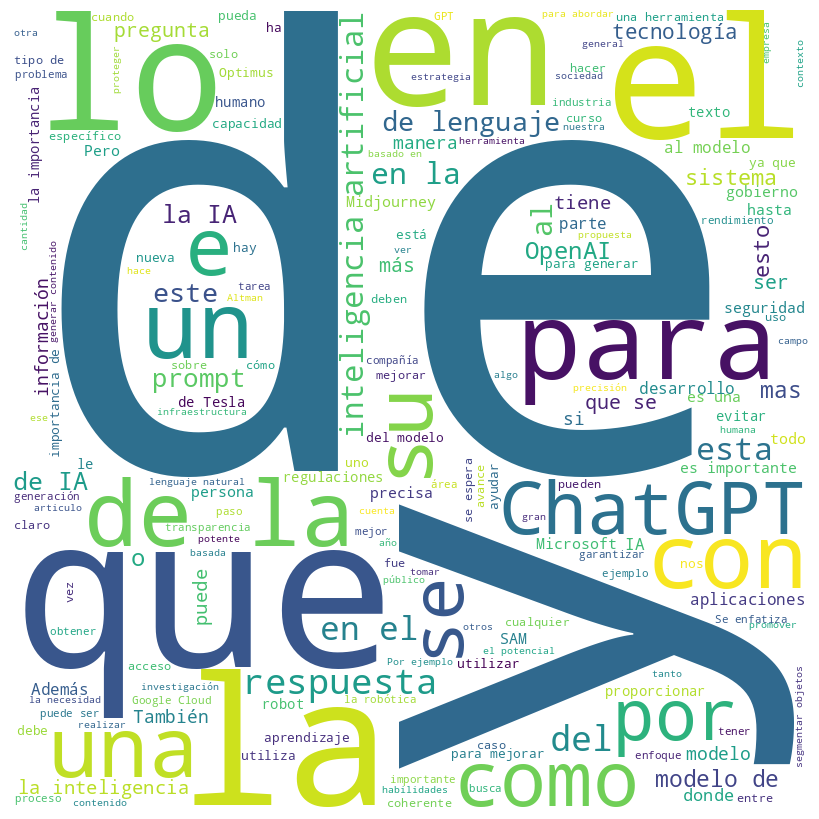

In [ ]:
# Crear la nube de palabras
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,
                      min_font_size = 10).generate(text)

# Mostrar la imagen
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

###*CONCLUSIÓN:*



Las palabras claves y con mayor tamaño que podemos ver en la nube de palabras dan indicaciones de la idea general del texto mostrando que el contenido de la página web de inteligencia artificial se enfoca en aspectos como modelos de IA, regulaciones gubernamentales, aplicaciones de procesamiento de lenguaje natural, chatbotsGPT y la importancia de actores clave en la industria de la IA. Esta nube de palabras nos brinda  un tipo de resumen del contenido del texto, y nos sirve para saber de que se trata de una forma rápida.

## Categoría: Salud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import es_core_news_sm

# Convertimos a minúsculas
df_salud['Texto'] = df_salud['Texto'].apply(lambda x: x.lower())

# Eliminamos puntuación
df_salud['Texto'] = df_salud['Texto'].str.replace('[^\w\s]', '')

# Eliminamos stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return " ".join(filtered_text)

df_salud['Texto'] = df_salud['Texto'].apply(remove_stopwords)

# Lematización
text_deportes = df_salud['Texto'].tolist()
text_completo_dep = " ".join(text_deportes)

nlp = es_core_news_sm.load()
doc = nlp(text_completo_dep)
lemmas = [tok.lemma_.lower() for tok in doc]
print(lemmas)

<ipython-input-43-49597eb669e3>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df_salud['Texto'] = df_salud['Texto'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['siesta', 'sueño', 'corto', 'objetivo', 'reponer', 'energía', 'así', 'explicar', 'jefa', 'neurofisiología', 'hospital', 'universitario', 'vinalopó', 'nohemí', 'rodríguez', 'fin', 'semana', 'pasado', 'cambiar', 'hora', 'llegado', 'invierno', 'cambio', 'hora', 'luz', 'reducir', 'considerablemente', 'tarde', 'producir', 'somnolencia', 'estación', 'año', 'necesitar', 'descansar', 'mediodía', 'seguir', 'tarea', 'tarde', 'entrada', 'blog', 'salud', 'grupo', 'ribera', 'contar', 'beneficio', 'siesta', 'corto', 'descanso', 'breve', 'después', 'comer', 'cómo', 'hacer él', 'manera', 'adecuado', 'varios', 'beneficio', 'descanso', 'breve', 'adulto', 'sano', 'especialista', 'grupo', 'sanitario', 'riberar', 'destacar', 'siguiente', 'tener', 'cuenta', 'embargo', 'tal', 'explicar', 'doctora', 'nohemí', 'rodríguez', 'patrón', 'sueño', 'igual', 'todo', 'edad', 'vida', 'característica', 'sueño', 'cambiar', 'recién', 'nacido', 'duermar', 'uno', '16', 'hora', 'diario', 'primero', 'año', 'vida', 'producir',

Por si se encuentran emojis en los artículos, los eliminamos.

In [ ]:
emot_obj = emot.core.emot() # Crear una instancia de la clase emot

def replace_emoticons_and_emojis(text):
    emoji_dict = emot_obj.emoji(text)
    for emoji in emoji_dict['value']:
        text = text.replace(emoji, '')  # Reemplazar el emoji con una cadena vacía
    return text

df_salud['Texto'] = df_salud['Texto'].apply(replace_emoticons_and_emojis)

NameError: ignored

### Análisis de frecuencia de palabras

In [ ]:
nltk.download('punkt')

text_salud = df_salud['Texto'].tolist()
text_completo_salud = " ".join(text_salud)

# Tokenizamos el texto
words = word_tokenize(text_completo_salud)
sentences = sent_tokenize(text_completo_salud)

# Creamos objetos FreqDist
dic_salud = FreqDist(words)
fdist_sentences = FreqDist(sentences)

# Imprimimos las frecuencias
dict(dic_salud)
sorted_words = sorted(dic_salud.items(), key=lambda x: x[1], reverse=True)
for word, frequency in sorted_words:
    print(f'{word}: {frequency}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ribera: 71
grupo: 54
sanitario: 50
blog: 48
cualquier: 38
aviso: 30
contenidos: 30
comunicación: 30
salud: 28
si: 24
uso: 24
puede: 22
imágenes: 21
ningún: 20
aparezcan: 20
contenido: 20
textos: 20
utilización: 20
acceso: 20
derecho: 20
explica: 16
vitamina: 16
caso: 15
d: 15
vida: 14
forma: 14
mismo: 14
alzheimer: 14
ser: 13
información: 12
inapropiado: 12
elementos: 12
tipo: 12
ello: 12
acciones: 12
hospital: 11
proporcionar: 11
hace: 11
demás: 11
alguno: 11
distribución: 11
momento: 11
necesidad: 11
previo: 11
establecido: 11
presente: 11
mismos: 11
cáncer: 11
pueden: 11
finalidad: 10
sustituye: 10
consulta: 10
médico: 10
responsable: 10
opiniones: 10
relacionados: 10
blogs: 10
informado: 10
existe: 10
ilícito: 10
procederá: 10
eliminación: 10
inmediata: 10
artículos: 10
sujetos: 10
protegidos: 10
derechos: 10
propiedad: 10
intelectual: 10
industrial: 10
disponiendo: 10
permisos: 10
necesarios: 10
fotografías: 10
diseños: 10
animaciones: 10
confiere: 10
visitante: 10
licencia: 10
ex

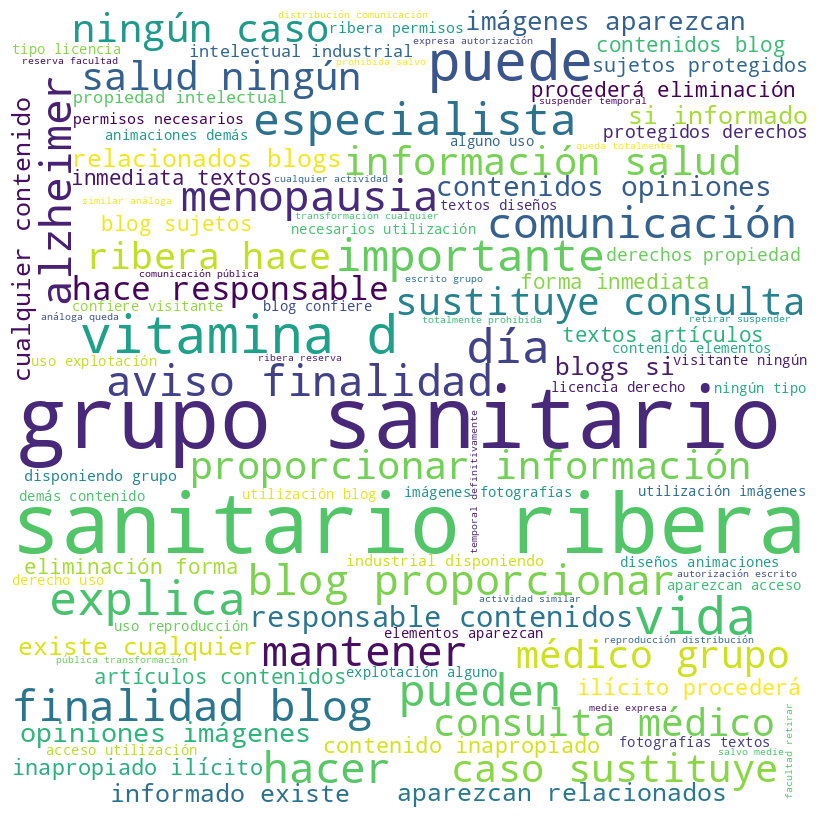

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = None,
min_font_size = 10).generate(text_completo_salud)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Categoría: Economía
Técnicas de normalización:
- Conversión a minúsculas.
- Eliminación de acentos.
- Eliminación de stopwords.
- Eliminación de puntuación.



In [ ]:
# Convertimos a minúsculas
df_economia['Texto_normalizado'] = df_economia['Texto'].apply(lambda x: x.lower())

# Eliminamos puntuación
df_economia['Texto_normalizado'] = df_economia['Texto'].str.replace('[^\w\s]', '')

# Eliminamos acentos
df_economia['Texto_normalizado'] = df_economia['Texto'].apply(remove_accents)

# Eliminamos stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return " ".join(filtered_text)

df_economia['Texto_normalizado'] = df_economia['Texto'].apply(remove_stopwords)

<ipython-input-61-00bd5d5f58d3>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_economia['Texto_normalizado'] = df_economia['Texto'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


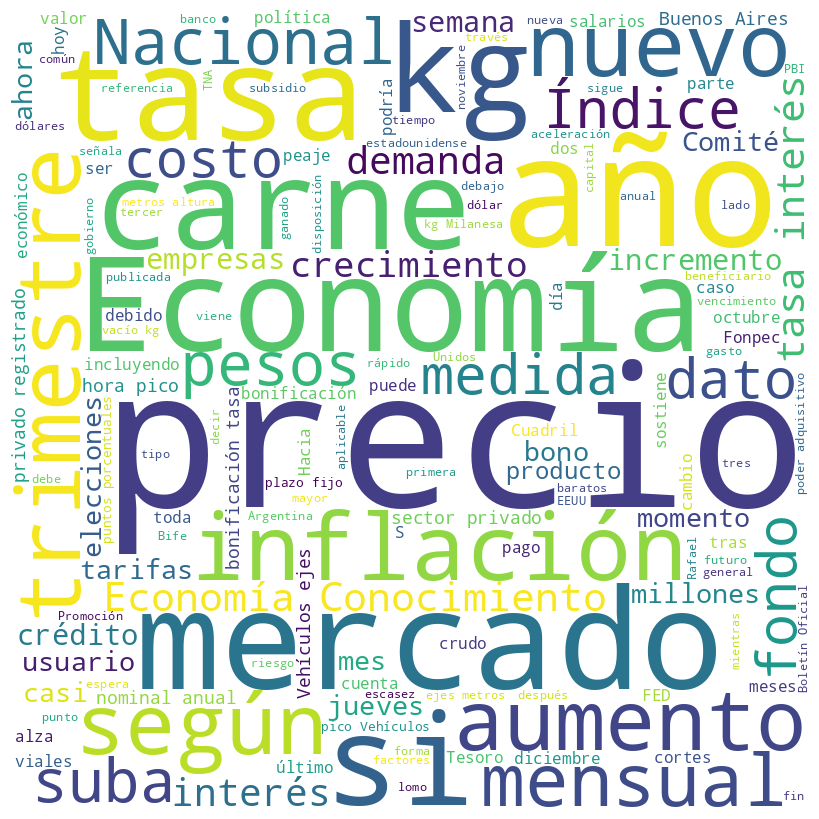

In [ ]:
text = ' '.join(df_economia['Texto_normalizado'])
# Crear la nube de palabras
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,
                      min_font_size = 10).generate(text)

# Mostrar la imagen
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Ejercicio 4

El propósito de este ejercicio es evaluar la similitud entre los títulos de las noticias de una de las categorías mediante el uso de modelos de embedding, particularmente aquellos presentados al final de la Unidad 2.

La categoría que elegimos para evaluar esta similitud es 'Inteligencia Artificial'.

Finalmente, reflexionaremos acerca de las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=27614c51ca5516597f99ab812bbde665c7e8e4a4631cb42d9d160ca65af17ce6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable

In [ ]:
# Cargamos el modelo preentrenado multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Extraemos las oraciones de la columna 'Titulo' en tu DataFrame df_ia
oraciones = df_ia['Titulo'].tolist()

# Codificamos las oraciones
embeddings = modelo.encode(oraciones, convert_to_tensor=True)

# Calculamos las puntuaciones de similitud
puntuaciones_coseno = util.cos_sim(embeddings, embeddings)

# Encontramos las puntuaciones de similitud más altas
pares = []
for i in range(len(puntuaciones_coseno)-1):
    for j in range(i+1, len(puntuaciones_coseno)):
        pares.append({'index': [i, j], 'score': puntuaciones_coseno[i][j]})

# Ordenamos las puntuaciones en orden decreciente
pares = sorted(pares, key=lambda x: x['score'], reverse=True)

# Creamos una tabla para mostrar los resultados
tabla = PrettyTable()
tabla.field_names = ["Oración 1", "Oración 2", "Puntuación de Similitud"]

# Añadimos las filas a la tabla
for par in pares[0:10]:
    i, j = par['index']
    tabla.add_row([oraciones[i], oraciones[j], f"{par['score']:.4f}"])

# Mostramos la tabla
print(tabla)

+----------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+-------------------------+
|                                    Oración 1                                     |                                            Oración 2                                            | Puntuación de Similitud |
+----------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+-------------------------+
|                Sam Altman, creador de Open IA lanza advertencia.                 | Sam Altman, CEO de OpenAI y su contestación curiosa sobre los planteos de expertos y Elon Musk. |          0.5915         |
|         Brad Smith de Microsoft y los cinco puntos para gobernar la IA.          | Sam Altman, CEO de OpenAI y su contestación curiosa sobre los planteos de exper

Como conclusión, destacamos que los resultados muestran  que el modelo se desempeña de manera no esperable con las expectativas en casi la mayoría de las situaciones. Las similitudes son demasiado bajas.\
Creemos que tiene limitaciones en términos de sensibilidad al contexto, ambigüedad y complejidad de la similitud.\
Relaciona las oraciones entre sí y se fija si hay alguna semejanza, pero no tiene en cuenta el contexto de cada oración y la causa, consecuencia de las palabras.\
Por ejemplo: en la puntuación de similitud que considera como la más baja (0.2786) las oraciones son: \
'Optimus, el robot humanoide de Tesla.' y ' Google Cloud: Cursos gratuitos para construir tu propia inteligencia artificial.'
en este caso el robot humanoide es construido con inteligencia artificial y ésto es una de las limitaciones que tiene el modelo, no interpreta la causa, consecuencia como relación.\
En cambio, en la puntuacion más alta que fue (0.5915),  con las siguientes oraciones: 'Sam Altman, creador de Open IA lanza advertencia.' y 'Sam Altman, CEO de OpenAI y su contestación curiosa sobre los planteos de expertos y Elon Musk',  se obtuvo porque se nombra lo mismo en ambas oraciones: 'Sam Altman'.

# Ejercicio 5

El objetivo de este ejercicio es crear un programa interactivo que permita al usuario ingresar una categoría y devuelva un resumen de las noticias presentes en el dataframe.

Como estamos trabajando en colab y la ejecución del resumen de las 10 noticias juntas se hace bastante lenta, decidimos realizar una pequeña modificación y además de que pedirle al usuario que elija una categoría, pedirle también que elija de cuál noticia prefiere ver un resumen.

Comenzamos definiendo una función menú, que le mostrará al usuario las categorías de las que disponemos información, y que le pedirá que ingrese una de ellas.

In [ ]:
def menu():
        print("\n Hola! Aquí te mostramos un listado de categorías.")
        print("1- Economía")
        print("2- Deportes")
        print("3- Inteligencia Artificial")
        print("4- Salud")
        print("5- Salir")
        print("\n")
        rta = int(input("¿Qué categoría eliges? \t"))
        while (rta != 1 and rta != 2 and rta != 3 and  rta !=4 and rta != 5):
          print("Categoría inválida. Vuelva a ingresar.")
          rta = int(input("¿Qué categoría eliges? \t"))
        return(rta)

A continuación, hicimos pruebas con 3 modelos distintos: dos de ellos de abstracción, y uno de extracción. En base a los resultados arrojados, decidimos quedarnos con el tercer modelo, que es el que mejor resume para este ejercicio.

In [ ]:
from transformers import AutoTokenizer, AutoModel, MT5ForConditionalGeneration, BartForConditionalGeneration

modelo1 = 'LeoCordoba/mt5-small-cc-news-es-titles' # Abstracción, textos cortos
modelo2 = 'csebuetnlp/mT5_multilingual_XLSum' # Extracción
modelo3 = 'ELiRF/NASES' # Abstracción

# Cargar el tokenizador y el modelo
tokenizer = AutoTokenizer.from_pretrained(modelo3)
model = BartForConditionalGeneration.from_pretrained(modelo3)

Definimos una función 'resumir' que recibe un texto y lo resume, según el modelo 3 entrenado anteriormente.

In [ ]:
def resumir(texto, min_length=50, max_length=100):

  # Preprocesar el texto y generar un resumen
  inputs = tokenizer.encode("summarize: " + texto, return_tensors="pt", max_length=512, truncation=True)
  summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
  resumen = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

  # Imprimir el resumen
  return resumen

Finalmente, a continuación se muestra el código principal. Consta de un bucle while en el cual el usuario podrá ingresar categorías y noticias de dicha categoría, según la que prefiera ver su resumen. Cuando desee salir, debe presionar el número 5.

In [ ]:
opcion = menu()
bandera = 0
while (bandera != 1):
 #Categoría Economía
 if opcion == 1:
   df_categoria = df[df['Categoria'] == 'Economía']
   print("\n Noticias para la categoría 'Economía': \n")
   for i, titulo in enumerate(df_categoria['Titulo']):
      print(i+1, "-", titulo)
   noticia = int(input("\n ¿Qué noticia deseas resumir: \t"))
   if 0 < noticia <= len(df_categoria):
       print("\n Aquí tienes un resumen de la noticia que has elegido: \n")
       resumen = resumir(df_categoria['Texto'].iloc[noticia - 1])
       print(resumen)
       print("\n Noticia completa: ", df_categoria['URL'].iloc[noticia - 1])
   else:
       print("Número de noticia fuera de rango")

 #Categoría Deportes
 if opcion == 2:
   df_categoria = df[df['Categoria'] == 'Deportes']
   print("\n Noticias para la categoría 'Deportes': \n")
   for i, titulo in enumerate(df_categoria['Titulo']):
       print(i+1, "-", titulo)
   noticia = int(input("\n ¿Qué noticia deseas resumir: \t"))
   if 0 < noticia <= len(df_categoria):
       print("\n Aquí tienes un resumen de la noticia que has elegido: \n")
       resumen = resumir(df_categoria['Texto'].iloc[noticia - 1])
       print(resumen)
       print("\n Noticia completa: ", df_categoria['URL'].iloc[noticia - 1])
   else:
       print("Número de noticia fuera de rango")

 #Categoría IA
 if opcion == 3:
   df_categoria = df[df['Categoria'] == 'Inteligencia Artificial']
   print("\n Noticias para la categoría 'Inteligencia Artificial': \n")
   for i, titulo in enumerate(df_categoria['Titulo']):
       print(i+1, "-", titulo)
   noticia = int(input("\n ¿Qué noticia deseas resumir: \t"))
   if 0 < noticia <= len(df_categoria):
       print("\n Aquí tienes un resumen de la noticia que has elegido: \n")
       resumen = resumir(df_categoria['Texto'].iloc[noticia - 1])
       print(resumen)
       print("\n Noticia completa: ", df_categoria['URL'].iloc[noticia - 1])
   else:
       print("Número de noticia fuera de rango")

 #Categoría Salud
 if opcion == 4:
   df_categoria = df[df['Categoria'] == 'Salud']
   print("\n Noticias para la categoría 'Salud': \n")
   for i, titulo in enumerate(df_categoria['Titulo']):
       print(i+1, "-", titulo)
   noticia = int(input("\n ¿Qué noticia deseas resumir: \t"))
   if 0 < noticia <= len(df_categoria):
       print("\n Aquí tienes un resumen de la noticia que has elegido: \n")
       resumen = resumir(df_categoria['Texto'].iloc[noticia - 1])
       print(resumen)
       print("\n Noticia completa: ", df_categoria['URL'].iloc[noticia - 1])
   else:
       print("Número de noticia fuera de rango")
 if opcion == 5:
  print("Usted decidió salir.")
  bandera = 1
  break
 opcion = menu()


 Hola! Aquí te mostramos un listado de categorías.
1- Economía
2- Deportes
3- Inteligencia Artificial
4- Salud
5- Salir




KeyboardInterrupt: ignored